## Project 1 - EDA

The dataset used in this project can be found on [Kaggle](https://www.kaggle.com/datasets/praveensoni06/1500-latest-movies-datasets-2025/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('movie_dataset.csv', index_col=0)
df.head(5)

,title,release_date,original_language,popularity,vote_count,vote_average,overview
0,Our Fault,2025-10-15,es,1096.6654,302,7.869,Jenna and Lion's wedding brings about the long...
1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,"In the wake of murder, new Furioza leader Gold..."
2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,In the aftermath of a devastating defeat by hi...
3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,Will Radford is a top analyst for Homeland Sec...
4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,Paranormal investigators Ed and Lorraine Warre...


In [3]:
df.describe()

,popularity,vote_count,vote_average
count,10000.000000,10000.000000,10000.000000
mean,7.085813,1470.490600,5.538950
std,16.379058,3405.494983,2.417306
min,2.616700,0.000000,0.000000
25%,4.499975,4.000000,5.113750
50%,4.975350,71.000000,6.300000
75%,6.172225,1173.250000,7.011000
max,1096.665400,38078.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              10000 non-null  object 
 1   release_date       9951 non-null   object 
 2   original_language  10000 non-null  object 
 3   popularity         10000 non-null  float64
 4   vote_count         10000 non-null  int64  
 5   vote_average       10000 non-null  float64
 6   overview           9758 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 625.0+ KB


In [5]:
df.shape

(10000, 7)

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              10000 non-null  object        
 1   release_date       9951 non-null   datetime64[ns]
 2   original_language  10000 non-null  object        
 3   popularity         10000 non-null  float64       
 4   vote_count         10000 non-null  int64         
 5   vote_average       10000 non-null  float64       
 6   overview           9758 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 625.0+ KB


In [7]:
df['Year'] = df['release_date'].dt.year
df['Month'] = df['release_date'].dt.month
df.head(5)

,title,release_date,original_language,popularity,vote_count,vote_average,overview,Year,Month
0,Our Fault,2025-10-15,es,1096.6654,302,7.869,Jenna and Lion's wedding brings about the long...,2025.0,10.0
1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,"In the wake of murder, new Furioza leader Gold...",2025.0,10.0
2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,In the aftermath of a devastating defeat by hi...,2025.0,7.0
3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,Will Radford is a top analyst for Homeland Sec...,2025.0,7.0
4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,Paranormal investigators Ed and Lorraine Warre...,2025.0,9.0


In [8]:
df.isna().sum()

title                  0
release_date          49
original_language      0
popularity             0
vote_count             0
vote_average           0
overview             242
Year                  49
Month                 49
dtype: int64

In [9]:
df[df['vote_count']==0]

,title,release_date,original_language,popularity,vote_count,vote_average,overview,Year,Month
91,No Tears in Hell,2025-10-29,en,38.4392,0,0.0,"In the frozen darkness of an Alaskan winter, a...",2025.0,10.0
158,Predator: Badlands,2025-11-05,en,25.8848,0,0.0,"Cast out from his clan, a young Predator finds...",2025.0,11.0
167,Cholo Zombies,2024-08-20,en,23.8094,0,0.0,A possessed artifact is traced back to Dr. Bla...,2024.0,8.0
217,Cholo Zombies,2024-08-20,en,23.8094,0,0.0,A possessed artifact is traced back to Dr. Bla...,2024.0,8.0
218,Zootopia 2,2025-11-26,en,21.3574,0,0.0,After cracking the biggest case in Zootopia's ...,2025.0,11.0
...,...,...,...,...,...,...,...,...,...
9987,"A co dál, Silvestře?",1986-02-12,cs,5.1494,0,0.0,NaN,1986.0,2.0
9989,Ahista Ahista,1981-10-01,hi,4.4242,0,0.0,Courtesan Madame Subbalaxmi heads a household ...,1981.0,10.0
9996,The Life and Flight of the Reverend Buck Shotte,1968-01-03,en,4.7699,0,0.0,NaN,1968.0,1.0
9997,Surcos de sangre,1950-06-23,es,3.9765,0,0.0,Melodrama that tells the tragedy of a peasant ...,1950.0,6.0


In [10]:
df = df.drop(df[df['vote_count'] == 0].index)

In [11]:
df.describe()

,release_date,popularity,vote_count,vote_average,Year,Month
count,8727,8728.000000,8728.000000,8728.000000,8727.000000,8727.000000
mean,2004-12-22 08:28:32.753523456,7.413149,1684.796746,6.344351,2004.452160,6.820786
min,1897-06-30 00:00:00,2.616700,1.000000,0.000000,1897.000000,1.000000
25%,1996-07-20 12:00:00,4.551375,12.000000,5.754750,1996.000000,4.000000
50%,2012-06-22 00:00:00,5.067200,145.000000,6.496500,2012.000000,7.000000
75%,2021-03-18 00:00:00,6.521425,1676.000000,7.128000,2021.000000,10.000000
max,2025-10-23 00:00:00,1096.665400,38078.000000,10.000000,2025.000000,12.000000
std,NaN,17.495609,3595.367257,1.258890,21.846572,3.453295


In [12]:
df[df['vote_average']==0]

,title,release_date,original_language,popularity,vote_count,vote_average,overview,Year,Month
4008,G-Day,2025-10-15,fr,5.1927,1,0.0,"June 1944. Europe is torn apart by war, and pr...",2025.0,10.0
6352,The Shepherd,1984-01-01,en,4.4228,1,0.0,A father chooses between his enemy and the lif...,1984.0,1.0
9358,Lessons in Love,2013-12-17,en,4.3085,1,0.0,The story is about a woman who is abducted and...,2013.0,12.0


In [13]:
df_nona = df.dropna()
df_nona.isna().sum()

title                0
release_date         0
original_language    0
popularity           0
vote_count           0
vote_average         0
overview             0
Year                 0
Month                0
dtype: int64

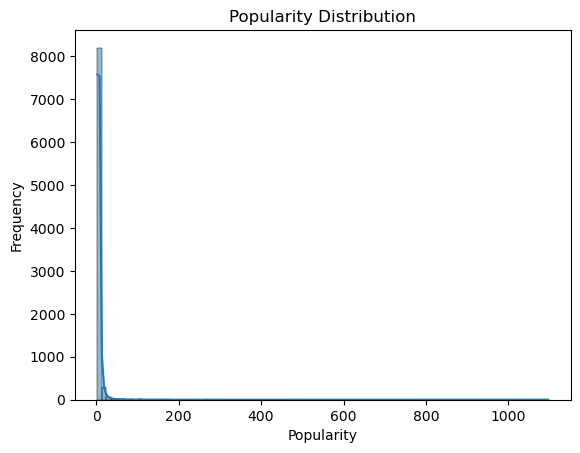

In [14]:
sns.histplot(df_nona['popularity'], bins=100, kde=True)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

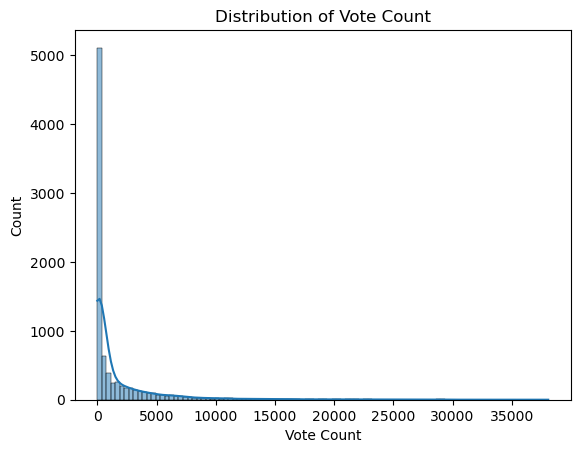

In [15]:
sns.histplot(df_nona['vote_count'], bins=100, kde=True)
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Count')
plt.show()

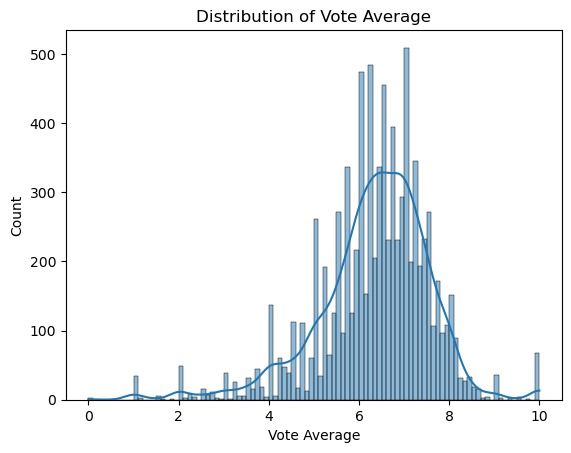

In [16]:
sns.histplot(df_nona['vote_average'], bins=100, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()

In [17]:
df_log = df_nona.copy()

In [18]:
# Log transform + Drop extreme outliers
df_log['pop_zscore'] = (df_log['popularity'] - df_log['popularity'].mean()) / df_log['popularity'].std()
df_log = df_log[df_log['pop_zscore'].abs() <= 3]
df_log['log_pop'] = np.log(df_log['popularity'])

df_log['votes_zscore'] = (df_log['vote_count'] - df_log['vote_count'].mean()) / df_log['vote_count'].std()
df_log = df_log[df_log['votes_zscore'].abs() <= 3]
df_log['log_votes'] = np.log(df_log['vote_count']+1)

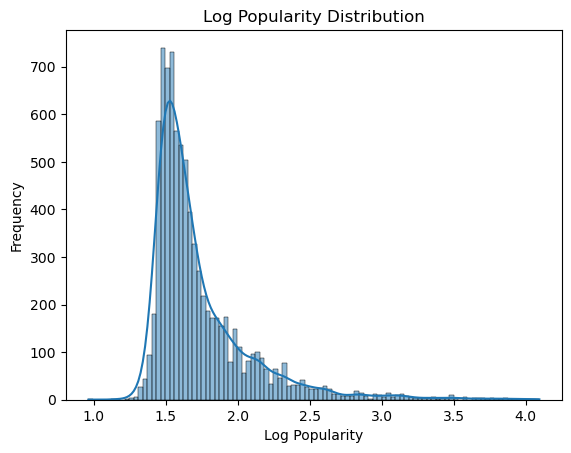

In [19]:
sns.histplot(df_log['log_pop'], bins=100, kde=True)
plt.title('Log Popularity Distribution')
plt.xlabel('Log Popularity')
plt.ylabel('Frequency')
plt.show()

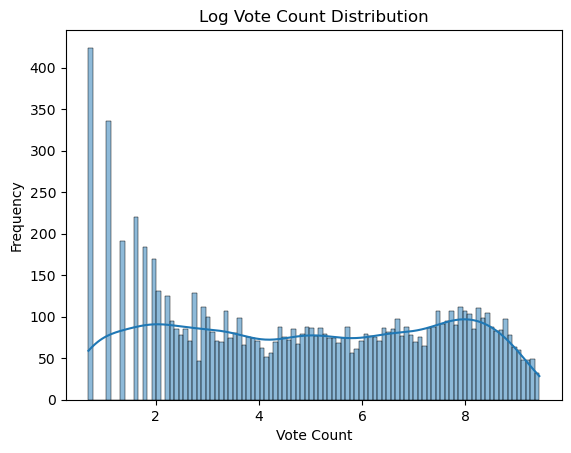

In [20]:
sns.histplot(df_log['log_votes'], bins=100, kde=True)
plt.title('Log Vote Count Distribution')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

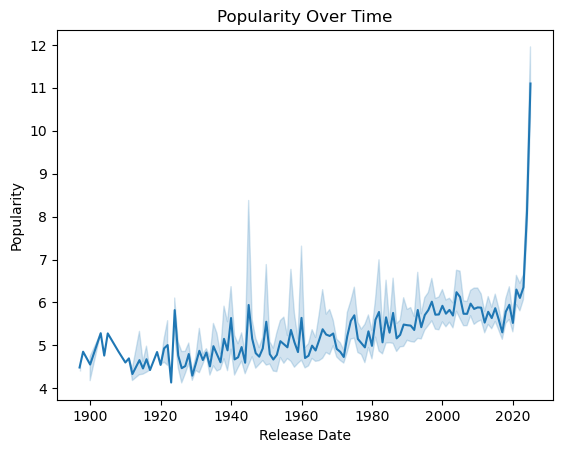

In [21]:
sns.lineplot(data=df_log, x='Year', y='popularity')
plt.title('Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.show()

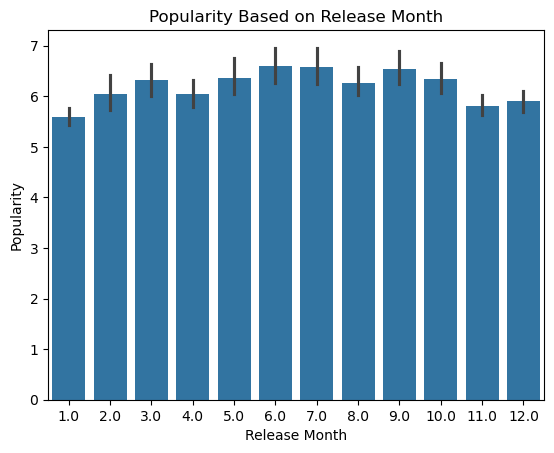

In [22]:
sns.barplot(data=df_log, x='Month', y='popularity')
plt.title('Popularity Based on Release Month')
plt.xlabel('Release Month')
plt.ylabel('Popularity')
plt.show()

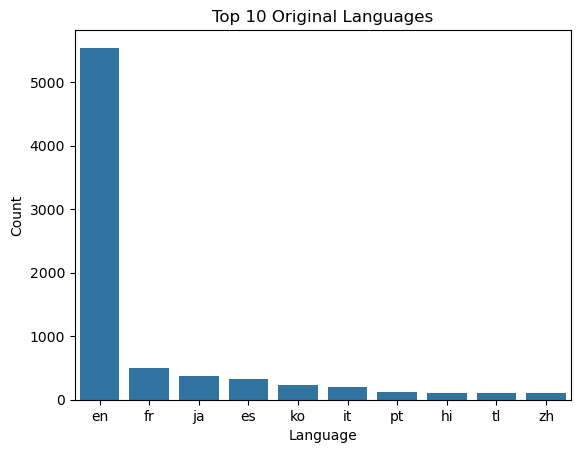

In [23]:
top_langs = df_log['original_language'].value_counts().head(10)
sns.barplot(x=top_langs.index, y=top_langs.values)
plt.title('Top 10 Original Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [24]:
df_log = pd.concat([df_log, pd.get_dummies(df_log['original_language'], drop_first=False)], axis=1)

In [25]:
df_log.head(5)

,title,release_date,original_language,popularity,vote_count,vote_average,overview,Year,Month,pop_zscore,...,sr,sv,ta,te,th,tl,tr,uk,xx,zh
56,Maintenance Required,2025-10-07,en,57.5560,82,5.556,"Charlie, the fiercely independent owner of an ...",2025.0,10.0,2.853780,...,False,False,False,False,False,False,False,False,False,False
59,Lilo & Stitch,2025-05-17,en,58.4649,1767,7.250,The wildly funny and touching story of a lonel...,2025.0,5.0,2.905516,...,False,False,False,False,False,False,False,False,False,False
61,Bitter Souls,2024-10-23,en,60.0183,1,3.000,"After a tragic accident, a teenage girl is res...",2024.0,10.0,2.993939,...,False,False,False,False,False,False,False,False,False,False
62,HIM,2025-09-18,en,51.2562,151,5.917,After suffering a potentially career-ending br...,2025.0,9.0,2.495183,...,False,False,False,False,False,False,False,False,False,False
63,Laila,2025-02-14,te,55.3748,6,5.167,"Sonu Model, a renowned beautician from the old...",2025.0,2.0,2.729622,...,False,False,False,True,False,False,False,False,False,False


# Hypothesis Testing

## Hypothesis 1
$H_0$: Movies released after 2000 are not more popular than movies released before 2000 \
$H_1$: Movies released after 2000 are more popular than movies released before 2000 \
$\alpha$ = 0.05

In [26]:
df_h = df_log.copy()

In [27]:
alpha = 0.05
pop_before_2000 = df_h[df_h['Year'] < 2000]['popularity']
pop_after_2000 = df_h[df_h['Year'] >= 2000]['popularity']

t_stat, p_value = stats.ttest_ind(pop_after_2000, pop_before_2000, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 18.477977336143574
P-value: 4.860602377538931e-75


In [28]:
if p_value < alpha:
    print(f'As {p_value} is less than {alpha}, we reject the null hypothesis and conclude that movies released after the year'
    f' 2000 are more popular than movies released before the year 2000')
else:
    print(f'As {p_value} is greater than {alpha}, we fail to reject the null hypothesis and conclude that there is no difference'
    f' in popularity in movies for before 2000 and after 2000')

As 4.860602377538931e-75 is less than 0.05, we reject the null hypothesis and conclude that movies released after the year 2000 are more popular than movies released before the year 2000


## Hypothesis 2
$H_0$: English movies do not reieve a higher vote average than non-english movies \
$H_1$: English movies recieve a higher vote average than non-english movies \
$\alpha$ = 0.05


In [29]:
alpha = 0.05
engish_movies = df_h[df_h['original_language']=='en']['vote_average']
non_english_movies = df_h[df_h['original_language']!='en']['vote_average']

t_stat, p_value = stats.ttest_ind(engish_movies, non_english_movies, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.4916050335492463
P-value: 0.06793323837057166


In [30]:
if p_value < alpha:
    print(f'As {p_value} is less than {alpha}, we reject the null hypothesis and conclude that english movies do recieve a higher'
    f' voter average than non-english movies')
else:
    print(f'As {p_value} is greater than {alpha}, we fail to reject the null hypothesis and conclude that english movies do not recieve a'
    f' higher voter average than non-english movies')

As 0.06793323837057166 is greater than 0.05, we fail to reject the null hypothesis and conclude that english movies do not recieve a higher voter average than non-english movies


## Hypothesis 3 

$H_0$: There is no difference in average popularity between movies released in different months. \
$H_1$: At least one month has a different average popularity. \
$\alpha$ = 0.05

In [31]:
alpha = 0.05
pop_by_month = [df_log[df_log['Month'] == m]['popularity'] for m in range(1, 13)]

f_stat, p_value = stats.f_oneway(*pop_by_month)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.4916050335492463
P-value: 7.896214004987e-07


In [32]:
if p_value < alpha:
    print(f'As {p_value:} < alpha {alpha}, we reject the null hypothesis and conclude that '
          f' there is a significant difference in average popularity between months.')
else:
    print(f'As {p_value:} >= alpha {alpha}, we fail to reject the null hypothesis and conclude that. '
          f' there is no significant difference in average popularity between months.')

As 7.896214004987e-07 < alpha 0.05, we reject the null hypothesis and conclude that  there is a significant difference in average popularity between months.
